<a href="https://colab.research.google.com/github/TheFaheem/ML-Projects/blob/Main/Credit%20Card%20Fraudlent%20Prediction/Credit_Card_Fraudlent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Dependicies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# **Reading** the csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From The Output below, We Clearly can See That Our Dataset Contain 83,279 Datas

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

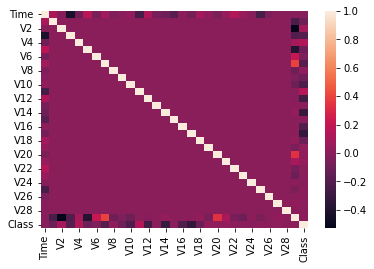

In [ ]:
sns.heatmap(data.corr())
sns.set(style='white')

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We Can see this Dataset is Highly Unbalanced

0 ==> Legit Transaction

1 ==> Fraud Transaction

In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
legit.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
legit_new = legit.sample(492)

In [ ]:
legit_new = legit_new.drop(columns = 'Time', axis = 1)

In [ ]:
new_data = pd.concat([legit_new, fraud], axis=0)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time
230923,0.783492,0.063863,-1.852034,-1.087171,2.664759,3.465712,-0.120480,0.528754,-1.524424,0.701449,...,0.488587,0.133273,0.639654,-1.421662,-0.047853,0.184120,0.075711,15.00,0,NaN
117407,-2.126311,0.442951,-0.592206,-2.194860,0.476977,-0.032203,0.947341,0.672535,-0.558120,-2.008576,...,0.245247,-0.352529,-1.273329,1.146143,-0.452593,-0.211468,-0.330592,133.57,0,NaN
64756,-0.117701,0.104681,1.518150,-0.985779,-0.620685,-0.178361,-0.125488,0.020377,-1.652324,0.587115,...,0.289981,-0.076765,0.080659,-0.687619,1.124665,0.113145,0.144177,18.60,0,NaN
176767,0.072417,0.150722,0.733581,-0.697199,-0.151271,0.003791,0.494468,0.091707,0.448422,-0.733030,...,-0.510480,0.394655,0.543873,-0.783041,0.175316,-0.030373,0.019692,92.50,0,NaN
268780,0.217980,1.027054,-0.595394,1.217162,0.787430,0.356067,0.395846,0.322031,-1.336525,0.385188,...,0.474898,0.000230,0.204187,-0.581163,2.383617,-0.268877,-0.102204,19.59,0,NaN


In [ ]:
new_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,169142.0
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,169347.0
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,169351.0
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,169966.0
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1,170348.0


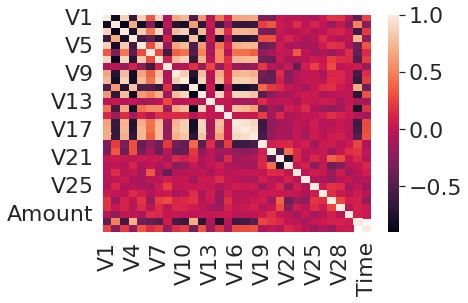

In [ ]:
sns.heatmap(new_data.corr())
sns.set(font_scale=2, style = 'white')

In [ ]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.036384,-0.026043,0.127213,-0.030951,-0.053104,-0.020089,-0.018192,0.076818,0.009522,0.008939,...,0.009037,-0.002884,-0.000116,0.021968,0.005672,0.000907,-0.008357,-0.013352,86.509959,NaN
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,80746.806911


In [ ]:
x = new_data.drop(columns = ['Time', 'Class'], axis=1)
y = new_data['Class']

In [ ]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
230923,0.783492,0.063863,-1.852034,-1.087171,2.664759,3.465712,-0.120480,0.528754,-1.524424,0.701449,...,0.527355,0.096004,0.488587,0.133273,0.639654,-1.421662,-0.047853,0.184120,0.075711,15.00
117407,-2.126311,0.442951,-0.592206,-2.194860,0.476977,-0.032203,0.947341,0.672535,-0.558120,-2.008576,...,-0.149786,0.173779,0.245247,-0.352529,-1.273329,1.146143,-0.452593,-0.211468,-0.330592,133.57
64756,-0.117701,0.104681,1.518150,-0.985779,-0.620685,-0.178361,-0.125488,0.020377,-1.652324,0.587115,...,-0.237321,-0.070492,0.289981,-0.076765,0.080659,-0.687619,1.124665,0.113145,0.144177,18.60
176767,0.072417,0.150722,0.733581,-0.697199,-0.151271,0.003791,0.494468,0.091707,0.448422,-0.733030,...,0.044774,-0.122734,-0.510480,0.394655,0.543873,-0.783041,0.175316,-0.030373,0.019692,92.50
268780,0.217980,1.027054,-0.595394,1.217162,0.787430,0.356067,0.395846,0.322031,-1.336525,0.385188,...,-0.062840,0.152650,0.474898,0.000230,0.204187,-0.581163,2.383617,-0.268877,-0.102204,19.59


In [ ]:
y.head()

8336      0
136272    0
46770     0
265036    0
2364      0
Name: Class, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify = y, random_state = 2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(787, 29)
(197, 29)


In [ ]:
x_train['Amount'].describe()

count     787.000000
mean      105.728704
std       235.510038
min         0.000000
25%         1.500000
50%        18.000000
75%        99.990000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.294205,-0.499242,0.527102,-1.102881,-0.086501,0.830811,1.007376,-0.170162,0.828702,0.224403,...,-0.196149,-0.120395,0.351447,0.076485,-0.362319,0.782758,-1.153838,0.064153,-0.366998,1.883628
1,0.108096,-0.364580,0.907704,-1.508477,0.282172,0.326325,0.483336,-0.059367,2.103361,0.444075,...,0.020642,-0.229065,0.107059,-0.335906,-1.184434,0.882937,1.295840,0.310118,0.120125,-0.249527
2,0.582040,-0.102233,0.296041,0.016104,0.662094,0.151593,0.631582,-0.139573,0.334767,0.661730,...,-0.086228,-0.089024,0.522194,0.028497,0.955765,-1.224638,-0.643876,-0.161073,0.146379,-0.444972
3,0.006611,0.211743,0.228932,-0.991111,0.258040,-0.050138,0.423856,0.222149,0.770380,0.722940,...,0.073983,-0.270139,-0.789117,0.142889,-1.764040,-0.105294,0.396729,0.027352,-0.298488,-0.389780
4,0.463841,-0.184399,0.484107,-0.872149,0.627116,-0.028354,0.652201,-0.102067,0.477527,0.428440,...,-0.087165,-0.258925,-0.674122,0.075459,0.944373,-0.614178,0.209047,0.141420,0.095810,-0.434095


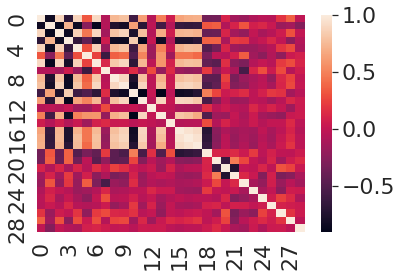

In [ ]:
plot = sns.heatmap(x_test.corr())
plt.show()

Logistic Regression Model

In [ ]:
lrmodel = LogisticRegression()

In [ ]:
lrmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
LrModel_training_data_prediction = lrmodel.predict(x_train)
LrModel_training_data_acc = accuracy_score(LrModel_training_data_prediction, y_train)

In [ ]:
print('The Accuracy of Our Model on  Training data is ', LrModel_training_data_acc)

The Accuracy of Our Model on  Training data is  0.9529860228716646


In [ ]:
LrModel_testing_data_prediction = lrmodel.predict(x_test)
LrModel_testing_data_acc = accuracy_score(LrModel_testing_data_prediction, y_test)

In [ ]:
print('Accuracy of Our Model on Testing data is ', LrModel_testing_data_acc)

Accuracy of Our Model on Testing data is  0.9289340101522843


Support Vector Machine Model

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
training_data_prediction = model.predict(x_train)
training_data_acc = accuracy_score(training_data_prediction, y_train)

In [ ]:
print('The Accuracy of Our Model on  Training data is ', training_data_acc)

The Accuracy of Our Model on  Training data is  0.9542566709021602


In [ ]:
testing_data_prediction = model.predict(x_test)
testing_data_acc = accuracy_score(testing_data_prediction, y_test)

In [ ]:
print('Accuracy of Our Model on Testing data is ', testing_data_acc)

Accuracy of Our Model on Testing data is  0.9187817258883249
